In [4]:
from sklearn.neural_network import MLPClassifier

mlpclassifier = MLPClassifier(hidden_layer_sizes=(100, 200, 300))

In [5]:
mlpclassifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 200, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [6]:
import numpy as np
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
data = pd.read_csv("MiceProtein_2f2c.csv", sep=",")

In [9]:
datavals = data.values

In [11]:
X = datavals[:,:2]

In [13]:
y = datavals[:,2]

In [14]:
y

array(['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
np.shape(X_train)

(240, 2)

In [22]:
np.shape(X_test)

(60, 2)

In [24]:
mlpclassifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 200, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [25]:
probabilities = mlpclassifier.predict_proba(X_test)

In [27]:
from sklearn.metrics import roc_auc_score

In [37]:
roc_auc_score(y_test, probabilities[:,0])

0.04582843713278496

In [31]:
y_test

array(['P', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P',
       'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'N',
       'P', 'P', 'P', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'P', 'P', 'N',
       'P', 'P', 'P', 'P', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'N', 'N',
       'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P'], dtype=object)

In [39]:
y_test_encoded = np.zeros(np.shape(y_test))

In [40]:
y_test_encoded[y_test == "P"] = 1

In [47]:
probabilities[:,:]

array([[9.23736691e-01, 7.62633086e-02],
       [9.99617577e-01, 3.82422929e-04],
       [9.94913997e-01, 5.08600314e-03],
       [9.44329057e-04, 9.99055671e-01],
       [8.06042429e-01, 1.93957571e-01],
       [4.61924399e-01, 5.38075601e-01],
       [9.36841399e-01, 6.31586013e-02],
       [9.89217336e-01, 1.07826641e-02],
       [9.72334398e-01, 2.76656017e-02],
       [7.48519568e-01, 2.51480432e-01],
       [9.99728513e-01, 2.71487399e-04],
       [9.63748697e-01, 3.62513033e-02],
       [5.70510793e-02, 9.42948921e-01],
       [1.77648226e-05, 9.99982235e-01],
       [1.00059708e-04, 9.99899940e-01],
       [6.55658487e-03, 9.93443415e-01],
       [9.88384620e-01, 1.16153796e-02],
       [4.15150842e-04, 9.99584849e-01],
       [8.89889193e-01, 1.10110807e-01],
       [8.22479128e-01, 1.77520872e-01],
       [8.31426552e-03, 9.91685734e-01],
       [1.29962426e-05, 9.99987004e-01],
       [8.53138582e-01, 1.46861418e-01],
       [9.47641492e-01, 5.23585084e-02],
       [6.023063

In [41]:
roc_auc_score(y_test, probabilities[:,1])

0.9541715628672152

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, auc
def plotROC(yscore, true, title=None, outfile=None):
    """Generates a receiver operating characteristic
        curve for the given prediction probabilities.
        
        Parameters
        ----------
        yscore : list of lists
        Probability scores.
        
        true : list of lists
        True labels.
        
        title : str
        The title of the confusion matrix.
        
        outfile : str
        The destination of the .pdf file generated.
        """
    fig = plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if title:
        plt.title(title)
    
    fpr, tpr, _ = roc_curve(true, yscore[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='(ROC AUC = %0.2f)' % (roc_auc),linewidth=2)

    plt.legend(loc="lower right")
    
    if outfile:
        pdfplot = PdfPages(outfile);
        pdfplot.savefig(fig)
        pdfplot.close()
    

def plotPRC(yscore, true, title=None, outfile=None):
    """Generates a precision recall curve for the
        given prediction probabilities.
        
        Parameters
        ----------
        yscore : list of lists
        Probability scores.
        
        true : list of lists
        True labels.
        
        title : str
        The title of the confusion matrix.
        
        outfile : str
        The destination of the .pdf file generated.
        """
    
    fig = plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    if title:
        plt.title(title)
    
    precision, recall, _ =  precision_recall_curve(true, yscore[:,1])
    prc_auc = average_precision_score(true, yscore[:,1])
    plt.plot(recall, precision, label='(Avg. Precision = %0.2f)' % (prc_auc),linewidth=1)
    
    plt.legend(loc="lower right")
    if outfile:
        pdfplot = PdfPages(outfile);
        pdfplot.savefig(fig)
        pdfplot.close()

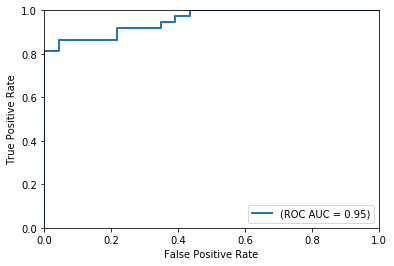

In [44]:
plotROC(probabilities, y_test_encoded)